In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [60]:
def convertToDataset(data, step, label):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y = [], []
    for i in range(len(data)-step):
        d = i + step  
        X.append(data[i:d,])
        Y.append(label)
    return np.array(X), np.array(Y)

In [61]:
N = 1500
t = np.arange(0, N)

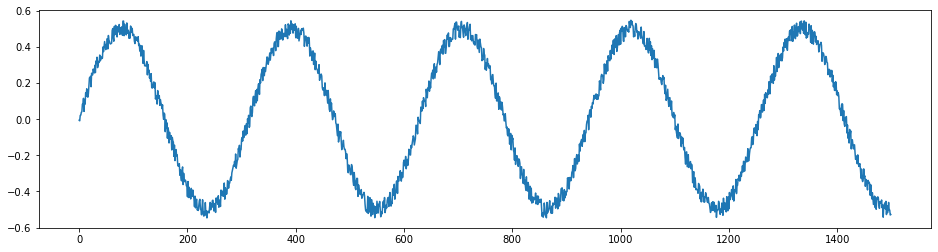

In [62]:
data_sine = np.sin(0.02 * t) / 2 + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(16, 4))
plt.plot(data_sine)
plt.show()

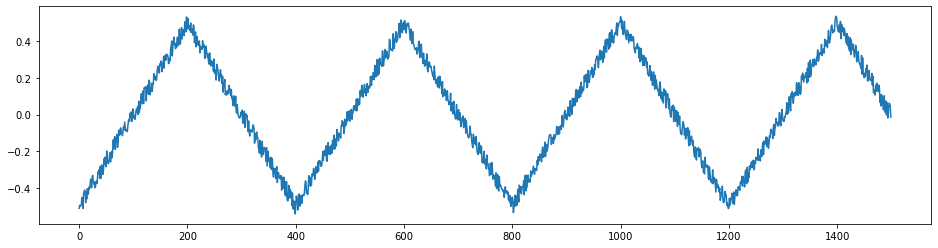

In [63]:
P = 200
A = 2
data_triangle = ((A/P) * (P - np.abs(t % (2*P) - P)) - 1) / 2 + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(16, 4))
plt.plot(data_triangle)
plt.show()

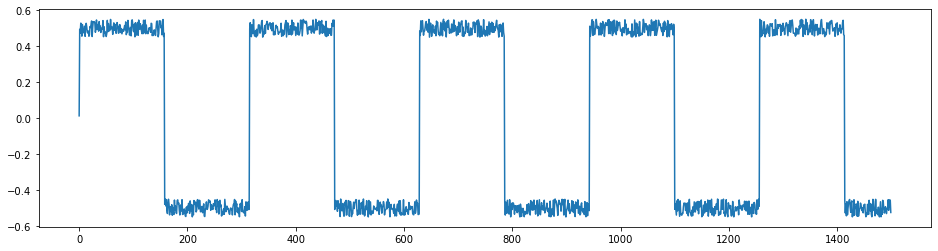

In [64]:
data_square = np.sign(np.sin(0.02 * t)) / 2 + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(16, 4))
plt.plot(data_square)
plt.show()

In [65]:
X_sine, Y_sine = convertToDataset(data_sine, step=40, label=0)
X_triangle, Y_triangle = convertToDataset(data_triangle, step=40, label=1)
X_square, Y_square = convertToDataset(data_square, step=40, label=2)

In [66]:
X = np.concatenate((X_sine, X_triangle, X_square), axis=0)
Y = np.concatenate((Y_sine, Y_triangle, Y_square), axis=0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [67]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [68]:
print(X_train.shape)
print(X_test.shape)

(3504, 40, 1)
(876, 40, 1)


In [69]:
model = Sequential([
    SimpleRNN(units=64, input_shape=(None, 1), activation="tanh"),
    # Dense(8, activation="relu"),
    Dense(3, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 64)                4224      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
Total params: 4,419
Trainable params: 4,419
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.input

<KerasTensor: shape=(None, None, 1) dtype=float32 (created by layer 'simple_rnn_3_input')>

In [ ]:
model.fit(X_train, Y_train, batch_size=16, epochs=200)

In [73]:
model.evaluate(X_train, Y_train)

110/110 [==============================] - 0s 979us/step - loss: 0.1818 - accuracy: 0.9227


[0.18184463679790497, 0.9226598143577576]

In [96]:
N = 40
t = np.arange(N, 2*N)
x = np.sin(0.02 * t) / 2 + np.random.uniform(-0.05, 0.05, N)
x = x.reshape(1, -1, 1)

result = model.predict(x)
print(np.argmax(result))

0


In [97]:
P = 200
A = 2
x = ((A/P) * (P - np.abs(t % (2*P) - P)) - 1) / 2 + np.random.uniform(-0.05, 0.05, N)
x = x.reshape(1, -1, 1)

result = model.predict(x)
print(np.argmax(result))

1


In [99]:
x = np.sign(np.sin(0.02 * t)) / 2 + np.random.uniform(-0.05, 0.05, N)
x = x.reshape(1, -1, 1)

result = model.predict(x)
print(np.argmax(result))

2
